In [1]:
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import scipy.stats
import matplotlib.pyplot as plt
import random
from skimage.feature import local_binary_pattern
from skimage import io

from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import sobel

In [2]:
train_csv = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv")
test_csv = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv")
imp_path="/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/"


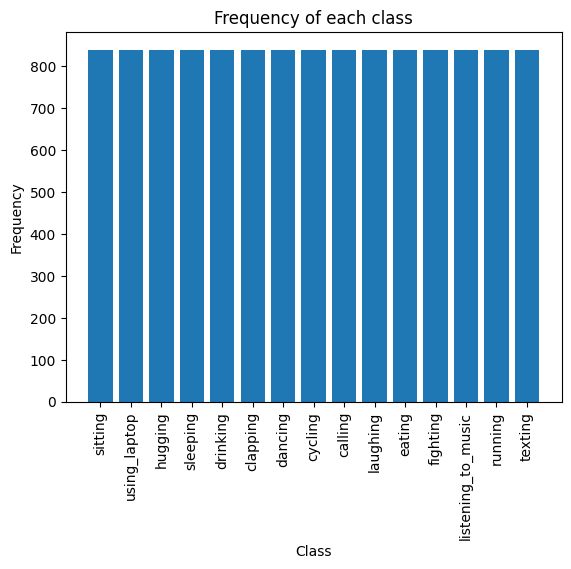

In [3]:
# freq for each class
freq=train_csv['label'].value_counts()
# plot the freq
plt.bar(freq.index,freq)
plt.xlabel('Class')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Frequency of each class')
plt.show()

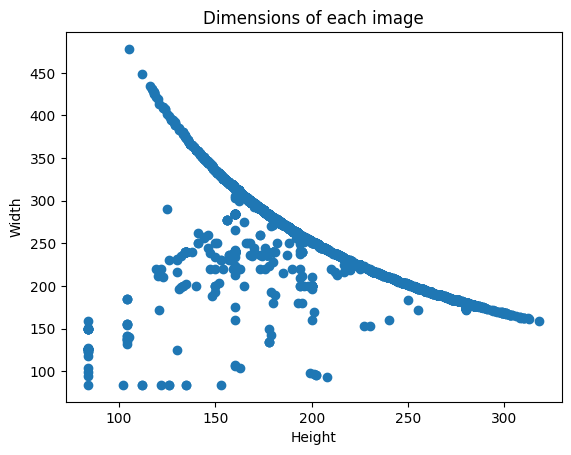

In [4]:
image_path=('/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train/')
x_axis=np.array([])
y_axis=np.array([])
for i in range(train_csv.shape[0]):
    img=plt.imread(image_path+train_csv['filename'][i])
    x_axis=np.append(x_axis,img.shape[0])
    y_axis=np.append(y_axis,img.shape[1])

plt.scatter(x_axis,y_axis)
plt.xlabel('Height')
plt.ylabel('Width')
plt.title('Dimensions of each image')
plt.show()

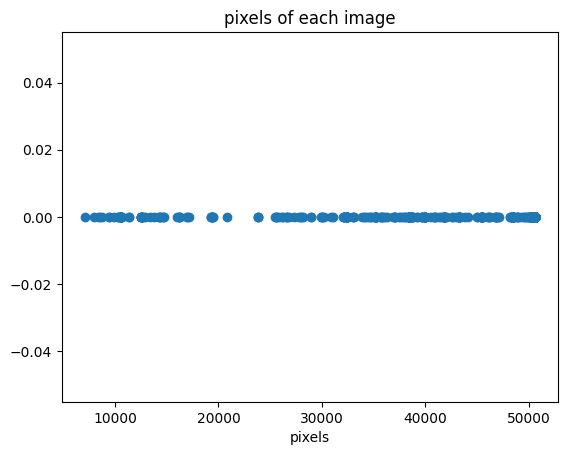

In [5]:
plt.scatter(x_axis*y_axis,[0]*len(x_axis))
plt.xlabel('pixels')
# plt.ylabel('Width')
plt.title('pixels of each image')
plt.show()

In [6]:
print(min(x_axis*y_axis),max(x_axis*y_axis),256*256,64*64,max(x_axis),max(y_axis))

7056.0 50625.0 65536 4096 318.0 478.0


In [10]:
def svf(filename):
    image = cv2.imread(filename)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image=cv2.resize(gray_image,(256,256))
    mean_pixel_value = np.mean(gray_image)
    median_pixel_value = np.median(gray_image)
    std_deviation = np.std(gray_image)
    skewness = scipy.stats.skew(gray_image, axis=None)
    kurtosis = scipy.stats.kurtosis(gray_image, axis=None)
    entropy = scipy.stats.entropy(gray_image.ravel())
    contrast = np.var(gray_image)
    variance = np.var(gray_image)
    energy = np.sum(gray_image.astype(float) ** 2)
    rms = np.sqrt(np.mean(gray_image.astype(float) ** 2))

    frequencies = np.fft.fft2(image)
    frequencies_shifted = np.fft.fftshift(frequencies)  
    
    magnitude_spectrum = np.abs(frequencies_shifted)

    power_spectrum = magnitude_spectrum ** 2
    spectral_centroid = np.mean(magnitude_spectrum)
    spectral_skewness = scipy.stats.skew(magnitude_spectrum.flatten())
    spectral_kurtosis = scipy.stats.kurtosis(magnitude_spectrum.flatten())
    spectral_entropy = scipy.stats.entropy(magnitude_spectrum.flatten())
    feat=[mean_pixel_value,median_pixel_value,std_deviation,skewness,kurtosis,entropy,contrast,variance,energy,rms,spectral_centroid,spectral_skewness,spectral_kurtosis,spectral_entropy]
    return feat
    
columns=['mean_pixel_value','median_pixel_value','std_deviation','skewness','kurtosis','entropy','contrast','variance','energy','rms','spectral_centroid','spectral_skewness','spectral_kurtosis','spectral_entropy',"label"]
df=pd.DataFrame(columns=columns)
for i in range(train_csv.shape[0]):
    filename=imp_path+train_csv['filename'][i]
    feat=svf(filename)
    feat.append(train_csv['label'][i])
    df.loc[i]=feat

df

,mean_pixel_value,median_pixel_value,std_deviation,skewness,kurtosis,entropy,contrast,variance,energy,rms,spectral_centroid,spectral_skewness,spectral_kurtosis,spectral_entropy,label
0,117.228043,122.0,62.381998,-0.035399,-0.668245,10.923671,3891.513655,3891.513655,1.155657e+09,132.792800,867.025894,20.584548,529.055972,10.233986,sitting
1,183.243820,185.0,48.270557,-0.432326,-0.265812,11.052691,2330.046677,2330.046677,2.353289e+09,189.494972,492.855477,28.833964,879.580185,9.145750,using_laptop
2,182.262848,195.0,61.278952,-0.973888,0.081882,11.021510,3755.109958,3755.109958,2.423184e+09,192.288470,682.723556,25.862677,738.837296,9.574151,hugging
3,125.554962,122.0,63.525617,0.034766,-1.221301,10.950120,4035.503998,4035.503998,1.297583e+09,140.710883,505.494845,28.646269,942.025152,9.589885,sleeping
4,131.133347,132.0,48.164393,-0.072365,-0.679949,11.017509,2319.808772,2319.808772,1.278985e+09,139.698831,619.913240,23.372162,611.814831,10.034192,using_laptop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,125.981949,124.0,56.066011,0.035027,-0.856117,10.982271,3143.397578,3143.397578,1.246157e+09,137.894340,637.010128,25.865530,781.528427,10.038592,sitting
12596,193.666046,210.0,54.458475,-1.211664,0.821526,11.042658,2965.725541,2965.725541,2.652390e+09,201.177193,614.313046,27.410893,797.097734,9.429429,clapping
12597,124.419769,119.0,72.580422,0.124459,-1.309243,10.904464,5267.917696,5267.917696,1.359754e+09,144.042343,598.220775,28.390462,1017.616274,9.874706,sitting
12598,237.549103,255.0,50.637677,-3.137908,8.359204,11.058485,2564.174316,2564.174316,3.866214e+09,242.886291,512.320401,22.729051,533.427193,8.640662,dancing


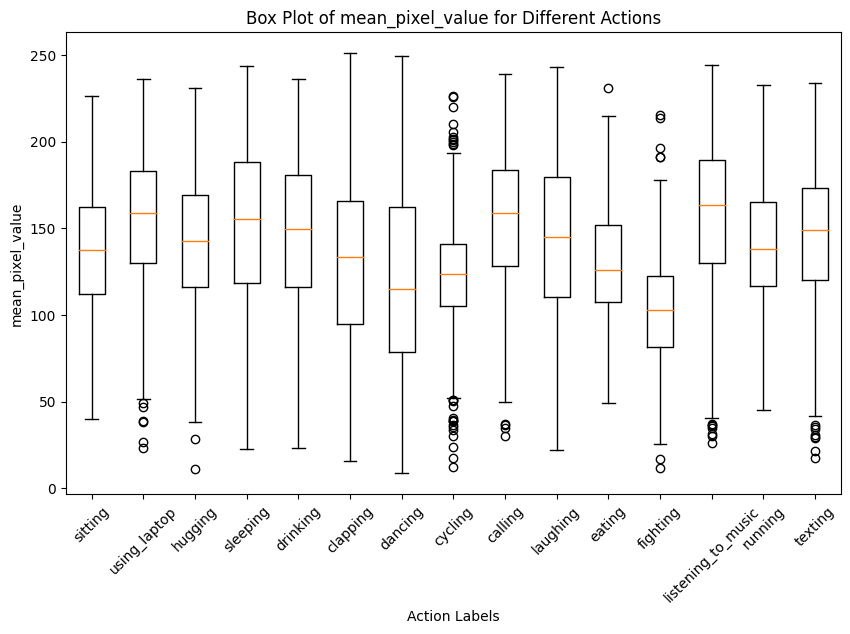

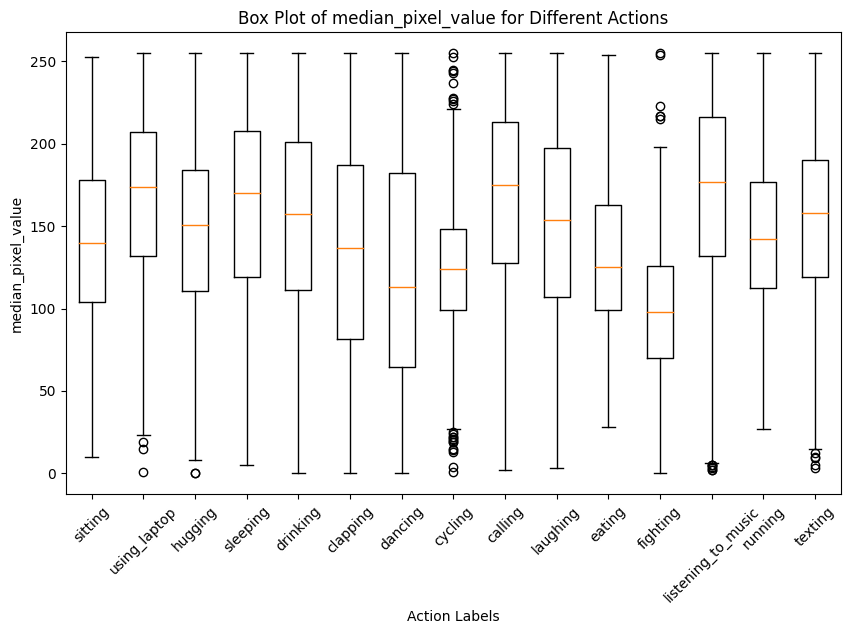

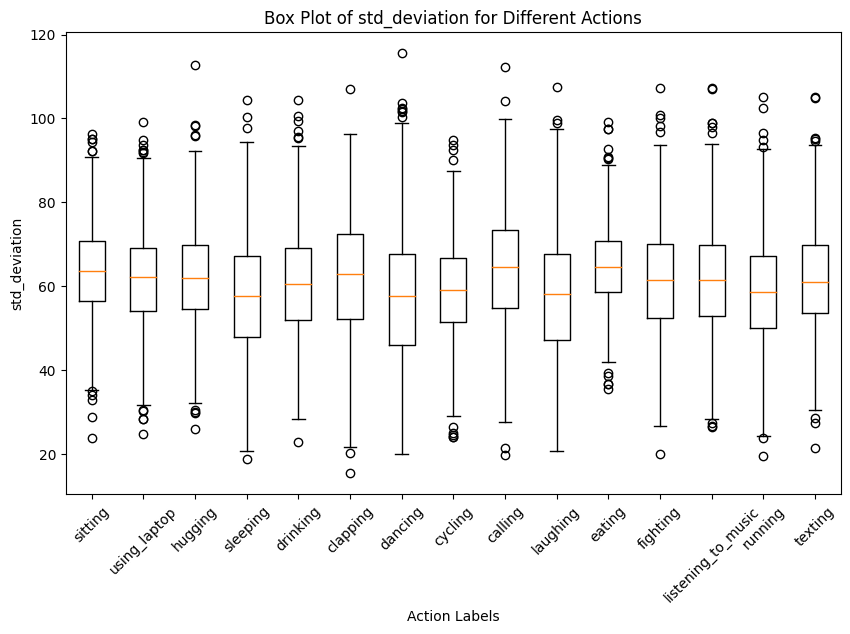

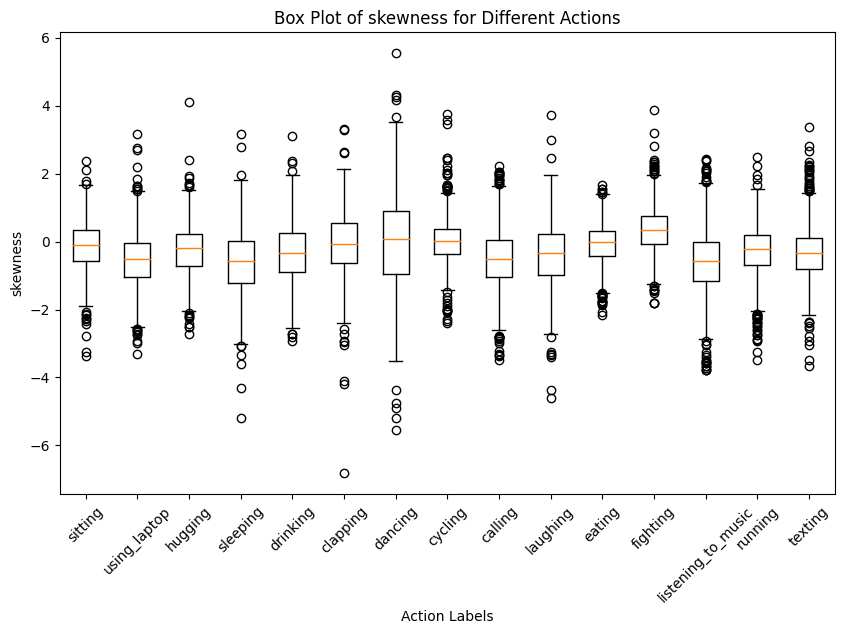

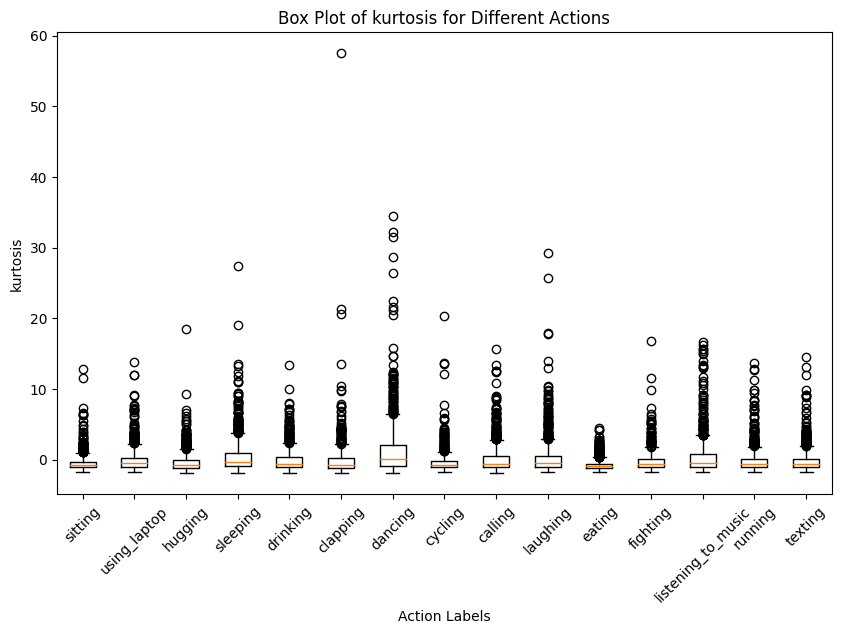

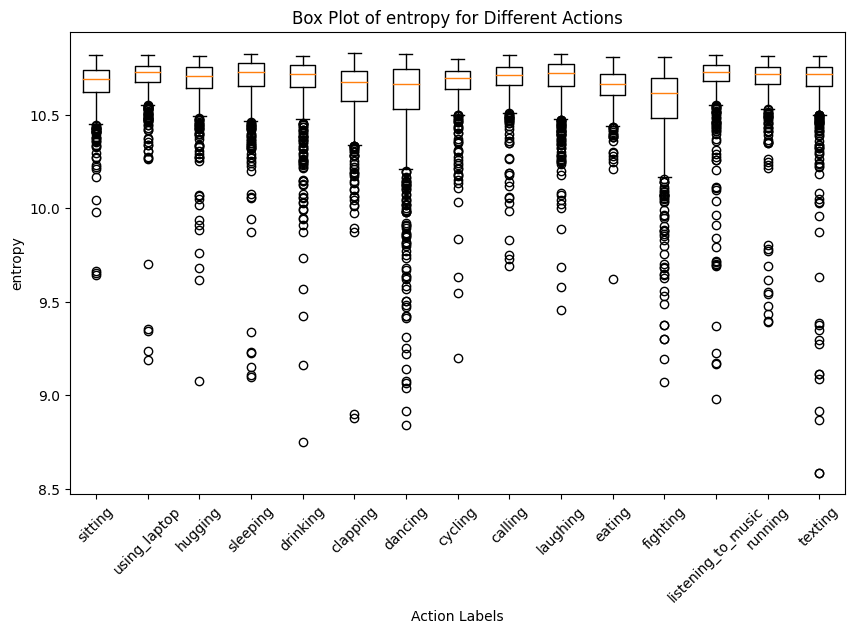

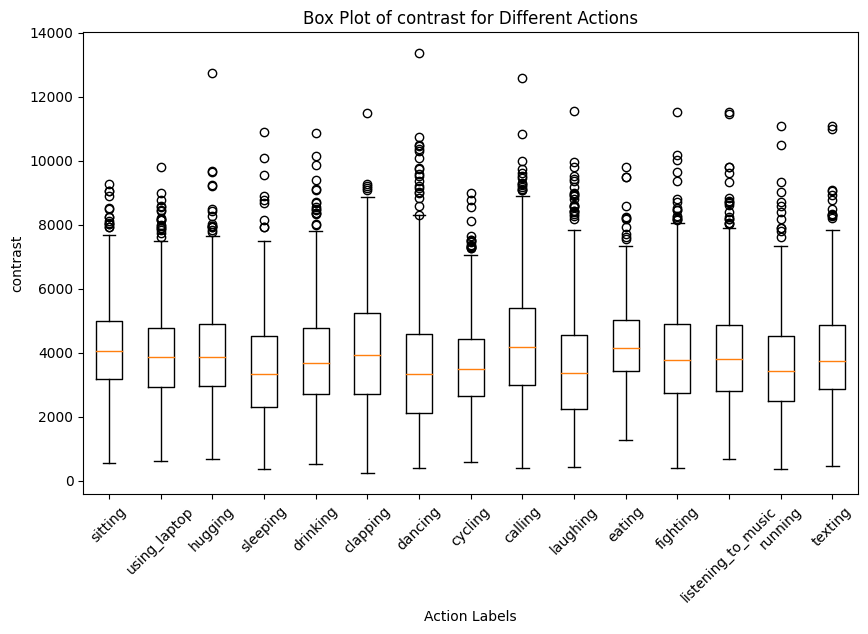

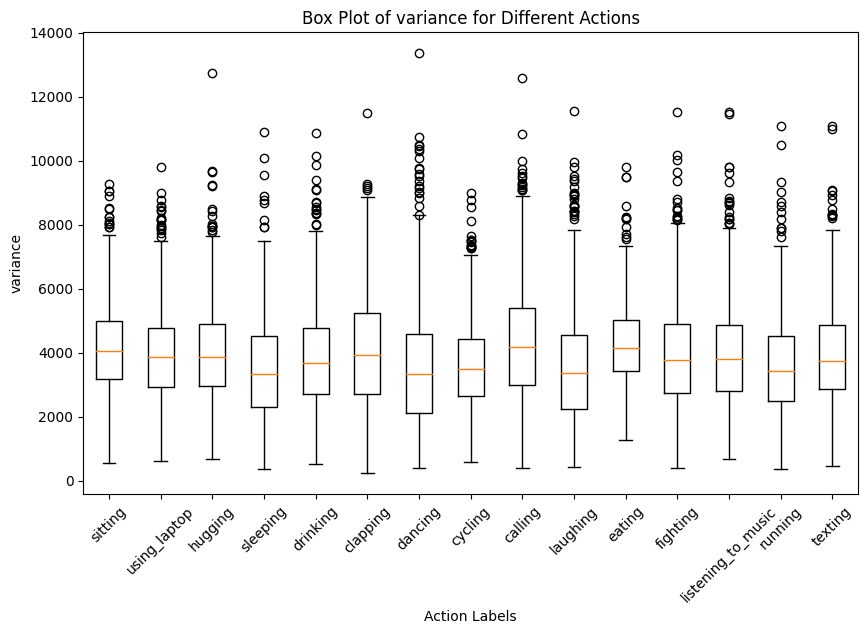

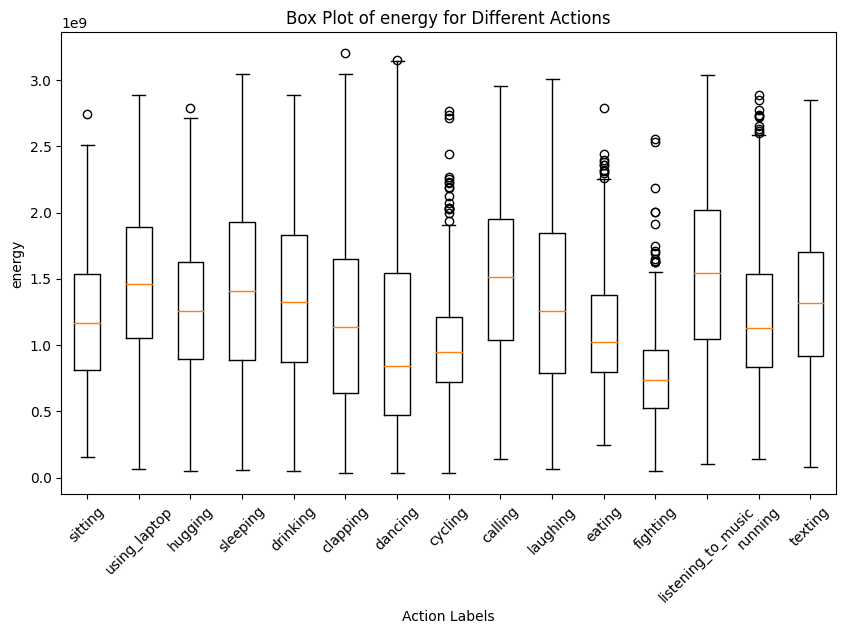

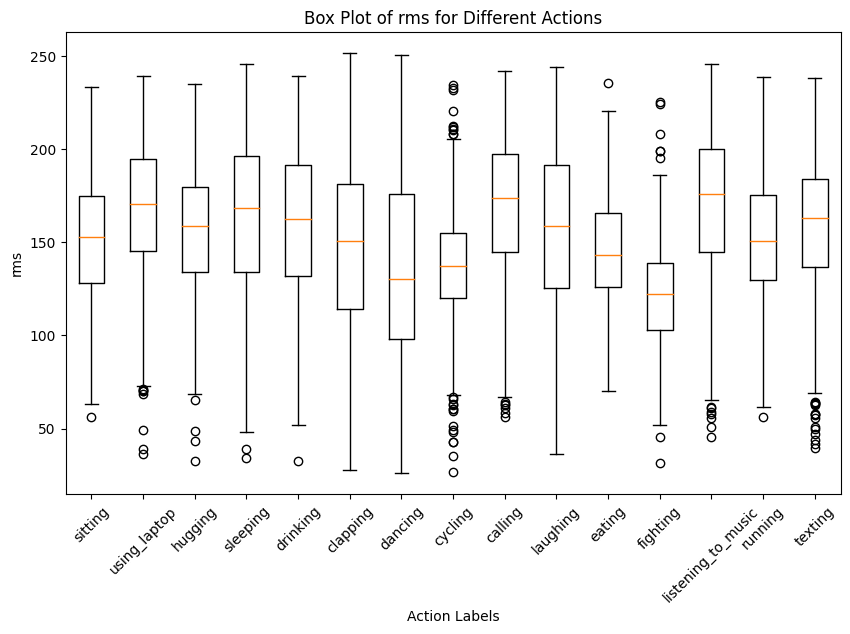

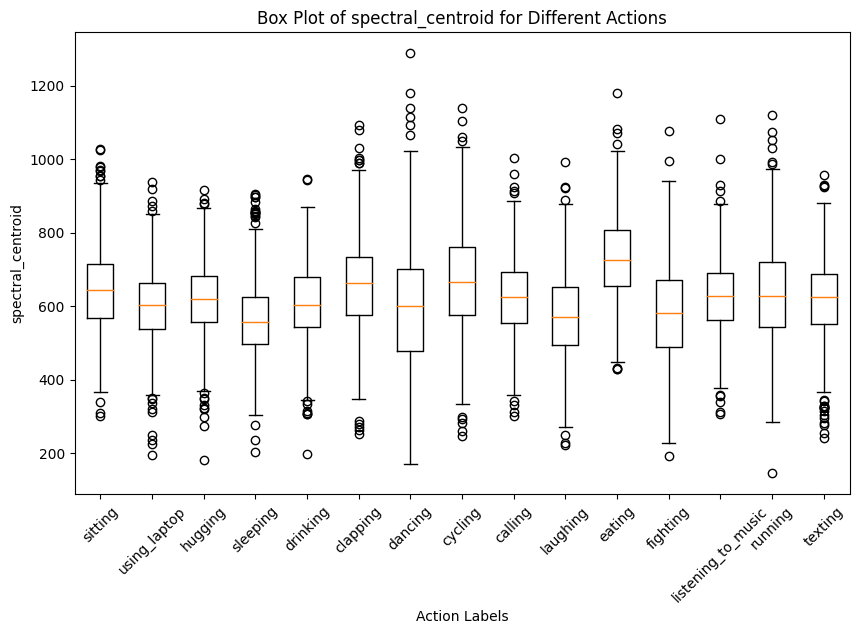

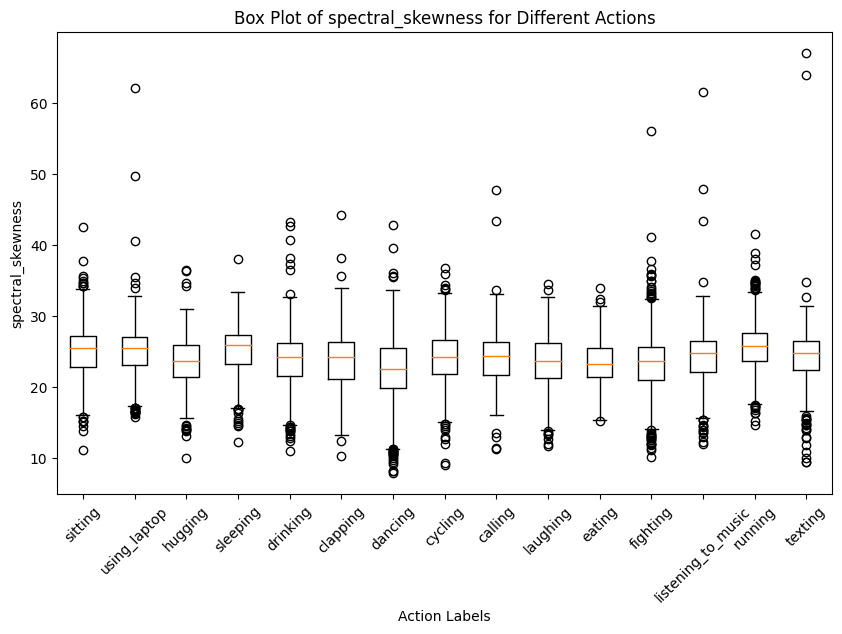

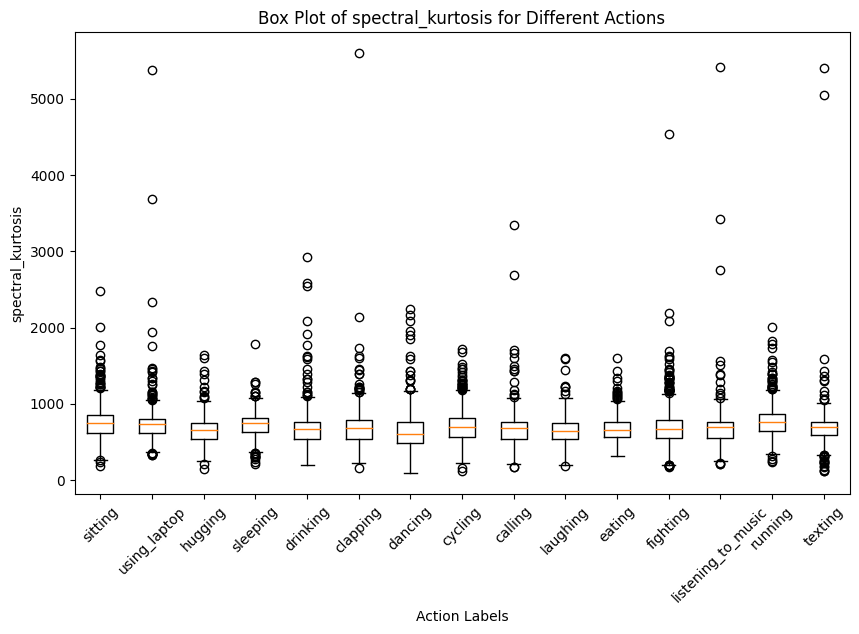

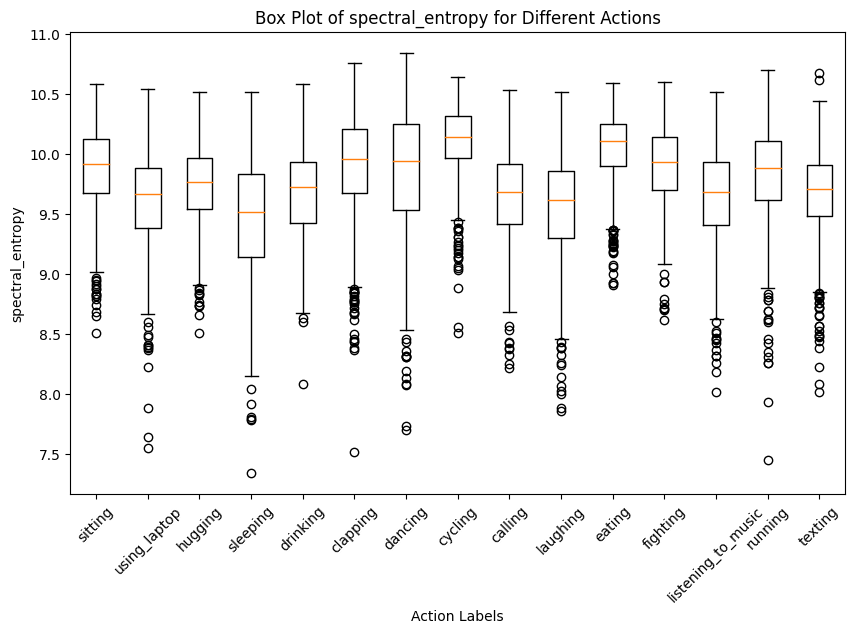

In [9]:
data=df
for i in columns:
    if i=="label":
        break
    plt.figure(figsize=(10, 6))
    plt.boxplot([data[data['label'] == label][i] for label in data['label'].unique()], labels=data['label'].unique())
    plt.title(f'Box Plot of {i} for Different Actions')
    plt.xlabel('Action Labels')
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
labels=np.unique(train_csv['label'])
# for label in labels:
#     x_axis=np.array([])
#     y_axis=np.array([])
#     for i in range(train_csv.shape[0]):
#         if train_csv['label'][i]==label:
#             img=plt.imread(image_path+train_csv['filename'][i])
#             x_axis=np.append(x_axis,img.shape[0])
#             y_axis=np.append(y_axis,img.shape[1])
#     plt.scatter(x_axis,y_axis)
#     plt.xlabel('Height')
#     plt.ylabel('Width')
#     plt.title('Dimensions of each image for class '+label)
#     plt.show()
labels.shape

In [ ]:


data=train_csv
unique_labels = data['label'].unique()

for label in unique_labels:
    hist_b = []
    hist_g = []
    hist_r = []
    classpics=data[data['label']==label]
    pics=classpics['filename']
    for filename in pics:
        image_path = os.path.join(imp_path, filename)
        image = cv2.imread(image_path)

#         hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hsv_image=image

        hist_hue = cv2.calcHist([hsv_image], [0], None, [256], [0, 256]) 
        hist_saturation = cv2.calcHist([hsv_image], [1], None, [256], [0, 256])
        hist_value = cv2.calcHist([hsv_image], [2], None, [256], [0, 256])
        hist_hue = cv2.normalize(hist_hue, hist_hue).flatten()
        hist_saturation = cv2.normalize(hist_saturation, hist_saturation).flatten()
        hist_value = cv2.normalize(hist_value, hist_value).flatten()

        # Append the histograms to the lists
        hist_b.append(hist_hue)
        hist_g.append(hist_saturation)
        hist_r.append(hist_value)
#         print(filename+"done")

    # Calculate the mean histogram for each channel
    mean_hist_b = np.mean(hist_b, axis=0)
    mean_hist_g = np.mean(hist_g, axis=0)
    mean_hist_r = np.mean(hist_r, axis=0)

    # Create a histogram plot
    plt.figure()
    plt.title(f"Color Histogram for the Class {label}")
    plt.xlabel("Bin")
    plt.ylabel("Frequency")
    plt.plot(mean_hist_b, color="b", label="blue")
    plt.plot(mean_hist_g, color="g", label="green")
    plt.plot(mean_hist_r, color="r", label="red")
#     plt.plot(mean_hist_b, color="b", label="Hue")
#     plt.plot(mean_hist_g, color="g", label="Saturation")
#     plt.plot(mean_hist_r, color="r", label="Value")
    plt.legend()
    plt.show()
#     break

In [ ]:
def compute_histogram(image):
#     print(image)
    img = cv2.imread(image)
#     imshow(img)
    b, g, r = cv2.split(img)
    
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    
    return hist_r, hist_g, hist_b    


In [ ]:
data=train_csv
unique_labels = data['label'].unique()

for label in unique_labels:
    random_images = data[data['label'] == label].sample(2)
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Color Histograms for Label: {label}')
    j=1
    for i, (_, row) in enumerate(random_images.iterrows()):
        image = imp_path+row['filename']
        hist_r, hist_g, hist_b = compute_histogram(image)
        
        img = cv2.imread(image)
        plt.subplot(2, 2, j)
        plt.title(f'Image {i+1}')

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        j+=1
        plt.subplot(2, 2, j)
        j+=1
        
        plt.plot(hist_r, color='red', label='Red')
        plt.plot(hist_g, color='green', label='Green')
        plt.plot(hist_b, color='blue', label='Blue')
        
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.legend()    
        
    plt.show()


In [ ]:
def HOGvis(imp):
    img = cv2.imread(imp, cv2.IMREAD_GRAYSCALE)
    resized_img = resize(img, (128,128)) 
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), visualize=True)


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

    ax1.imshow(resized_img, cmap=plt.cm.gray) 
    ax1.set_title('Input image') 

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
    ax2.set_title('Histogram of Oriented Gradients')

    plt.show()

In [ ]:


def LBP_plotter(image_path, image_name):
    org_img = io.imread(image_path, as_gray=True)
    radius = 4.5
    n_points = 30
    lbp_img = local_binary_pattern(img, n_points, radius, method='uniform')

    plt.figure()
    plt.subplot(121), plt.imshow(org_img, cmap='gray')
    plt.title('Original Image')
    plt.subplot(122), plt.imshow(lbp_img, cmap='gray')
    plt.title('LBP Filtered')
    plt.savefig(image_name)
    ply.show()

    
#  
# for label, image_paths in selected_images.items():
#     for count_img, image_path in enumerate(image_paths):
#         image_name = f"LBP_filtered_{label}_{count_img}.jpg"
#         LBP_plotter(image_path, image_name)
#         plt.suptitle(f'LBP for Acti: {label}')
#         plt.show()

df = train_csv

samples_per_class = 2

selected_images = {}

grouped = df.groupby('label')

for label, group in grouped:
    selected_images[label] = random.sample(group['filename'].tolist(), samples_per_class)

for label, images in selected_images.items():
    print(f"Class: {label}")
    print("Selected Images:")
    for image in images:
        print(image)
        HOGvis(imp_path+image)
        LBP_plotter(image_path,image_name)
        
    print("\n")

In [ ]:

# def apply_canny_edge_detection(image, lower_threshold=50, upper_threshold=150):
#     blurred = cv2.GaussianBlur(image, (5, 5), 1.4)
#     gradient_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
#     gradient_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

#     magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
#     angle = np.arctan2(gradient_y, gradient_x)

#     def non_max_suppression(magnitude, angle):
#         rows, cols = magnitude.shape
#         result = np.zeros_like(magnitude)

#         angle = np.rad2deg(angle)
#         angle[angle < 0] += 180  
#         for i in range(1, rows - 1):
#             for j in range(1, cols - 1):
#                 prev_pixel, next_pixel = 0, 0
#                 if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
#                     prev_pixel = magnitude[i, j - 1]
#                     next_pixel = magnitude[i, j + 1]
#                 elif (22.5 <= angle[i, j] < 67.5):
#                     prev_pixel = magnitude[i + 1, j - 1]
#                     next_pixel = magnitude[i - 1, j + 1]
#                 elif (67.5 <= angle[i, j] < 112.5):
#                     prev_pixel = magnitude[i + 1, j]
#                     next_pixel = magnitude[i - 1, j]
#                 elif (112.5 <= angle[i, j] < 157.5):
#                     prev_pixel = magnitude[i - 1, j - 1]
#                     next_pixel = magnitude[i + 1, j + 1]

#                 if (magnitude[i, j] >= prev_pixel) and (magnitude[i, j] >= next_pixel):
#                     result[i, j] = magnitude[i, j]

#         return result

#     non_max_magnitude = non_max_suppression(magnitude, angle)

#     # Apply edge tracking by hysteresis
#     edges = cv2.Canny(image, lower_threshold, upper_threshold)

#     return edges


In [ ]:
data = train_csv

unique_labels = data['label'].unique()
for label in unique_labels:
    print(label)
    random_image = data[data['label'] == label].sample(1)
    image_path = imp_path+random_image['filename'].values[0]
    print(image_path)

    image =cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    image = resize(image, (128,128)) 
    plt.figure(figsize=(10,10))
    plt.subplot(141)
    plt.title('Original Image')
    plt.imshow(image, cmap="gray")
    
    
    entropy_img=entropy(image,disk(1))
    plt.subplot(142)
    plt.title('entropy')
    plt.imshow(entropy_img, cmap='gray')
    
    sobel_filtered = sobel(image)
    plt.subplot(143)
    plt.title('Sobel Filter')
    plt.imshow(sobel_filtered, cmap='gray')
    
    
    image=cv2.imread(image_path)
    image=cv2.resize(image,(128,128))
    canny = cv2.Canny(image,50,150)
    plt.subplot(144)
    plt.title('Canny Filter')
    plt.imshow(canny, cmap='gray')

    
    plt.show()
